# Submission for DSN 2023 Qualification hackathon.

link to zindi competition: https://zindi.africa/competitions/free-ai-classes-in-every-city-hackathon-2023

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Datasets

In [2]:
train = pd.read_csv("Housing_dataset_train.csv")
test = pd.read_csv("Housing_dataset_test.csv")
submission = pd.read_csv("Sample_submission.csv")

Now we observe the data type and properties of the data provided

In [3]:
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [4]:
test.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1


In [5]:
train.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [6]:
test.describe()

,ID,bedroom,bathroom,parking_space
count,6000.000000,6000.000000,6000.000000,6000.000000
mean,4818.699167,4.329833,3.105667,3.132333
std,3832.336902,2.454733,2.033189,1.604551
min,2.000000,1.000000,1.000000,1.000000
25%,1647.000000,2.000000,1.000000,2.000000
50%,3433.000000,4.000000,2.000000,3.000000
75%,7970.000000,6.000000,5.000000,4.000000
max,12995.000000,9.000000,7.000000,6.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [8]:
# percentage of missing values per column
for i in train.columns:
    print(i, train[str(i)].isnull().sum() / train.shape[0] * 100)

ID 0.0
loc 12.950000000000001
title 12.3
bedroom 12.85
bathroom 12.892857142857142
parking_space 12.935714285714287
price 0.0


# Exploratory Data Analysis

In [9]:
train["loc"].value_counts()

Kaduna         370
Anambra        363
Benue          355
Yobe           353
Borno          351
Kano           351
Cross River    349
Nasarawa       349
Imo            348
Zamfara        348
Ebonyi         346
Kebbi          346
Ogun           345
Katsina        345
Ondo           344
Gombe          343
Bauchi         342
Oyo            341
Adamawa        341
Bayelsa        340
Osun           338
Plateau        338
Jigawa         337
Ekiti          336
Kwara          333
Niger          330
Akwa Ibom      329
Lagos          328
Sokoto         326
Delta          325
Enugu          324
Rivers         323
Kogi           321
Taraba         315
Abia           312
Edo            302
Name: loc, dtype: int64

<BarContainer object of 36 artists>

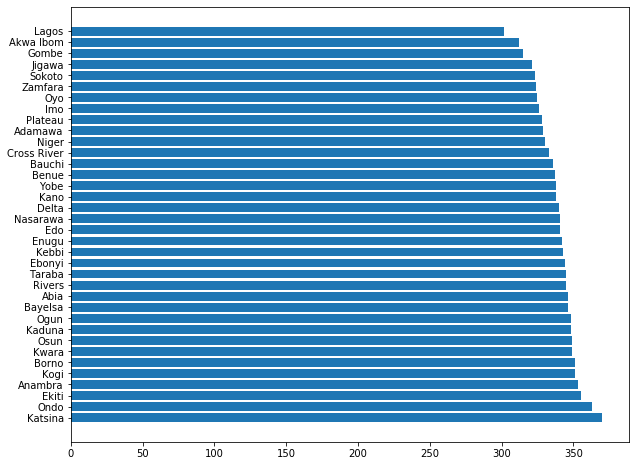

In [10]:
plt.figure(figsize=(10,8))
plt.barh(train["loc"][train["loc"].notna()].unique(), train["loc"].value_counts())
# plt.figure(figsize=(20,12))
# sns.countplot(train["loc"])

In [11]:
train["title"].value_counts()

Flat                    1372
Apartment               1331
Townhouse               1327
Mansion                 1322
Detached duplex         1312
Penthouse               1306
Semi-detached duplex    1299
Bungalow                1293
Terrace duplex          1266
Cottage                  450
Name: title, dtype: int64

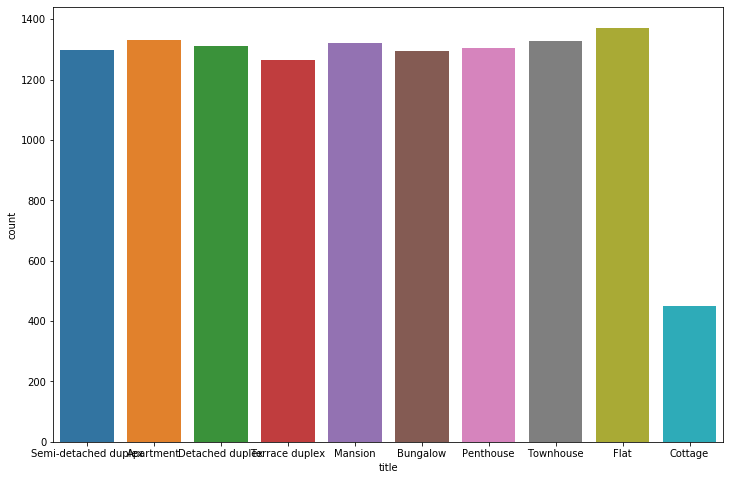

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(train["title"])

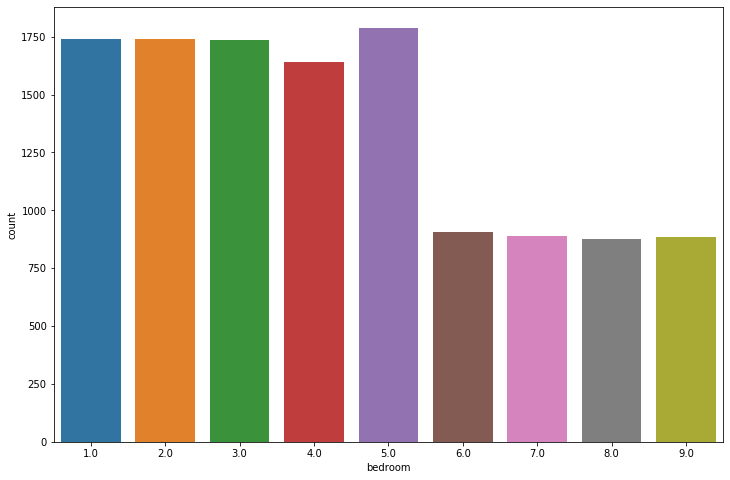

In [13]:
plt.figure(figsize=(12,8))
# plt.bar(train["bedroom"][train["bedroom"].notna()].unique(), train["bedroom"].value_counsns.countplot(train["bedroom"])
sns.countplot(train["bedroom"])

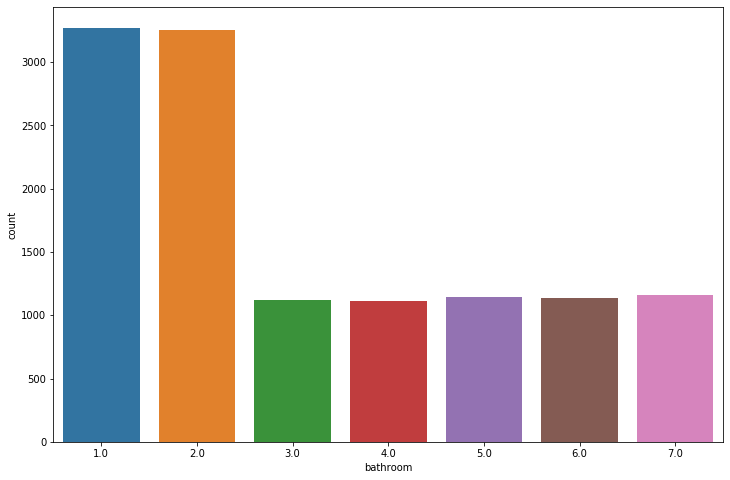

In [14]:
# plt.bar(train["bathroom"][train["bathroom"].notna()].unique(), train["bathroom"].value_counts())
plt.figure(figsize=(12,8))
sns.countplot(train["bathroom"])

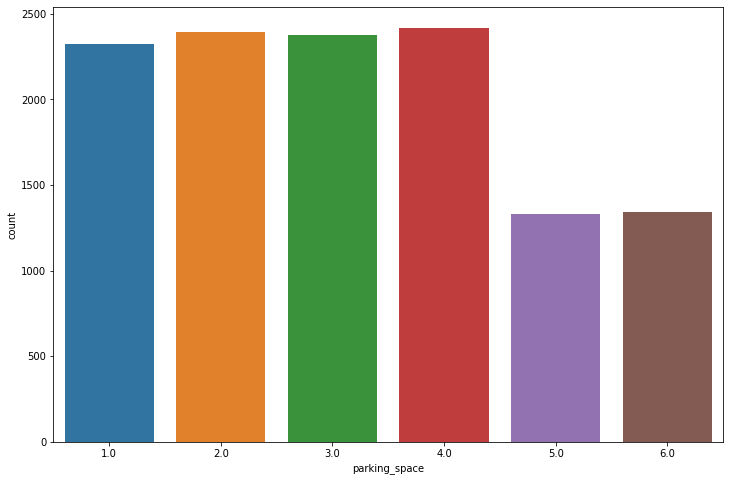

In [15]:
# plt.bar(train["parking_space"][train["parking_space"].notna()].unique(), train["parking_space"].value_counts())
plt.figure(figsize=(12,8))
sns.countplot(train["parking_space"])

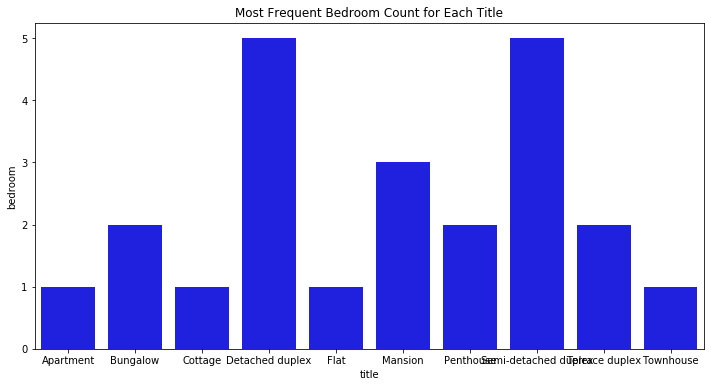

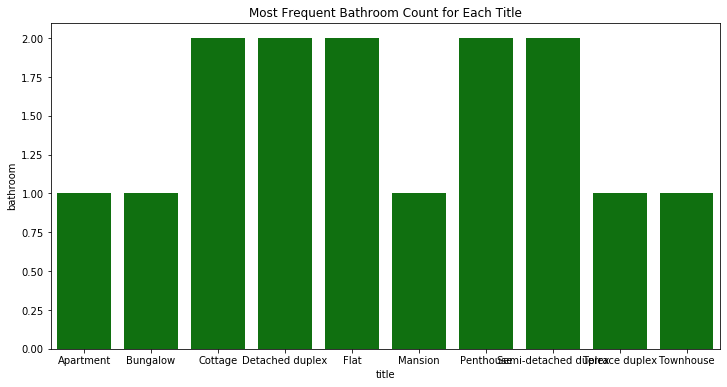

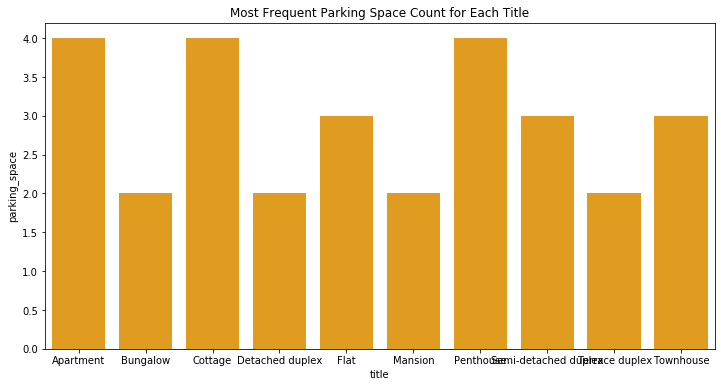

In [16]:
grouped_data = train.groupby('title').agg({
    'bedroom': lambda x: x.value_counts().idxmax(),
    'bathroom': lambda x: x.value_counts().idxmax(),
    'parking_space': lambda x: x.value_counts().idxmax()
}).reset_index()

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the value counts for 'bedroom'
sns.barplot(x='title', y='bedroom', data=grouped_data, ax=ax, color='blue')
ax.set_title('Most Frequent Bedroom Count for Each Title')

# Show the plot
plt.show()

# Create a new figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the value counts for 'bathroom'
sns.barplot(x='title', y='bathroom', data=grouped_data, ax=ax, color='green')
ax.set_title('Most Frequent Bathroom Count for Each Title')

# Show the plot
plt.show()

# Create another figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the value counts for 'parking_space'
sns.barplot(x='title', y='parking_space', data=grouped_data, ax=ax, color='orange')
ax.set_title('Most Frequent Parking Space Count for Each Title')

# Show the plot
plt.show()

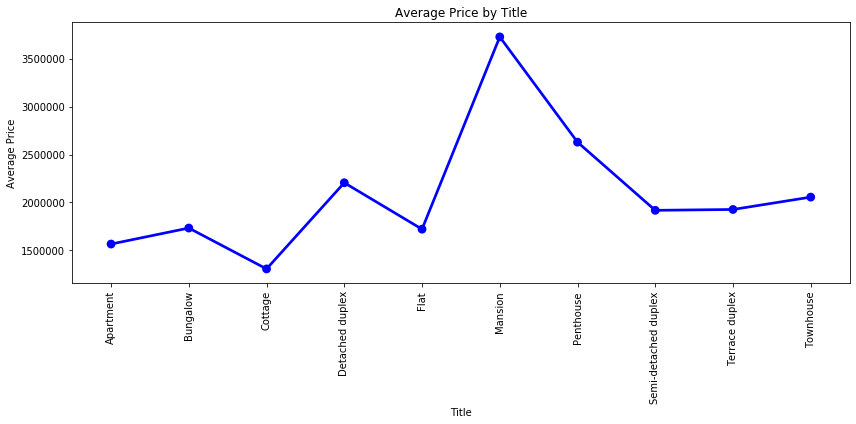

In [17]:
average_prices = train.groupby('title')['price'].mean().reset_index()

# Create the point plot
plt.figure(figsize=(12, 6))
sns.pointplot(x='title', y='price', data=average_prices, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Title')
plt.ylabel('Average Price')
plt.title('Average Price by Title')
plt.tight_layout()
plt.show()

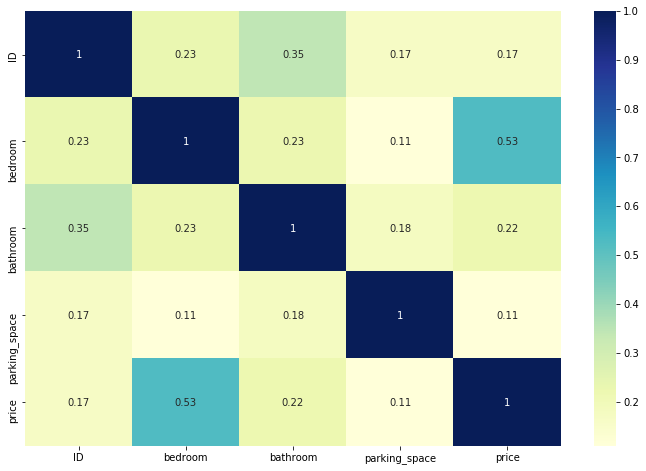

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)

# Working with null values

In [19]:
train.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [20]:
train["title"] = train["title"].fillna("unknown")

In [21]:
train.isnull().sum()

ID                  0
loc              1813
title               0
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [22]:
train["loc"] = train["loc"].fillna("unknown")

In [23]:
train.isnull().sum()

ID                  0
loc                 0
title               0
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

# Model Building

In [24]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
train["loc"] = oe.fit_transform(train[["loc"]])
test["loc"] = oe.transform(test[["loc"]])
train["title"] = oe.fit_transform(train[["title"]])
test["title"] = oe.transform(test[["title"]])

In [25]:
target = train["price"]
train.drop("price", 1, inplace=True)
target.shape

(14000,)

In [26]:
train.drop("ID", 1, inplace=True)
test.drop("ID", 1, inplace=True)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [28]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=42)

In [29]:
from sklearn.model_selection import KFold

In [30]:
from catboost import CatBoostRegressor

In [31]:
target = target.values

In [32]:
target

array([1149999.565, 1672416.689, 3364799.814, ..., 2406812.693,
       3348918.718, 2858516.89 ])

In [49]:
cat = CatBoostRegressor(iterations=1000,learning_rate=0.1)

In [50]:
# Define the number of folds for cross-validation
num_folds = 10
rmse_scores = []

# Initialize K-Fold cross-validator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"Processing Fold {fold+1}...")
    
    X_train_fold, X_val_fold = train.iloc[train_index,:], train.iloc[val_index,:]
    y_train_fold, y_val_fold = target[train_index], target[val_index]
    
    # Fit the model on the training data
    cat.fit(X_train_fold, y_train_fold, eval_set=(X_val_fold, y_val_fold), verbose=False)
    
    # Make predictions on the validation data
    y_pred_val = cat.predict(X_val_fold)
    
    # Calculate the mean squared error for this fold
    fold_rmse = mean_squared_error(y_val_fold, y_pred_val, squared=False)
    rmse_scores.append(fold_rmse)

# Calculate the mean and standard deviation of the mean squared errors across all folds
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f"\nMean MSE: {mean_rmse}")
print(f"Standard Deviation of MSE: {std_rmse}")

# Train the model on the full training data
# model.fit(X_train, y_train, verbose=False)

# Make predictions on the test data
test_pred = cat.predict(test)

Processing Fold 1...
Processing Fold 2...
Processing Fold 3...
Processing Fold 4...
Processing Fold 5...
Processing Fold 6...
Processing Fold 7...
Processing Fold 8...
Processing Fold 9...
Processing Fold 10...

Mean MSE: 529127.9529518045
Standard Deviation of MSE: 78279.90840161641


# Making Submission

In [51]:
submission["price"] = test_pred
submission.shape

(6000, 2)

In [52]:
submission.to_csv("cat.csv", index=False)